In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
sales = pd.read_csv('sales.csv')

In [3]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [4]:
#checking the number of columns and rows
sales.shape

(113036, 18)

In [5]:
#checking null values in the csv file
sales.isnull().values.any()

False

In [6]:
#names of the columns
sales.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [8]:
sales.Date = pd.to_datetime(sales.Date)

In [9]:
sales.Year = pd.to_numeric(sales.Year)

In [10]:
countries = pd.unique(sales.Country)

In [11]:
print(countries)

['Canada' 'Australia' 'United States' 'Germany' 'France' 'United Kingdom']


In [12]:
age_group = pd.unique(sales.Age_Group)
age_group

array(['Youth (<25)', 'Adults (35-64)', 'Young Adults (25-34)',
       'Seniors (64+)'], dtype=object)

In [13]:
data = pd.DataFrame(columns= countries, index= age_group)

In [14]:
for country in countries:
    for age in age_group:
        count = sales[(sales['Country'] == country) & (sales['Age_Group'] == age)].shape[0]
        data.loc[age, country] = count

In [15]:
data

,Canada,Australia,United States,Germany,France,United Kingdom
Youth (<25),2326,4382,5698,1708,1590,2124
Adults (35-64),7158,10394,21960,4868,4786,6658
Young Adults (25-34),4578,9102,11270,4416,4552,4736
Seniors (64+),116,58,278,106,70,102


In [15]:
data.iloc[0]

Canada            2326
Australia         4382
United States     5698
Germany           1708
France            1590
United Kingdom    2124
Name: Youth (<25), dtype: object

In [16]:
colors = ['#ff8080', '#66ffc2', '#d9ff66', '#ffb366', '#66ccff', '#d11aff']

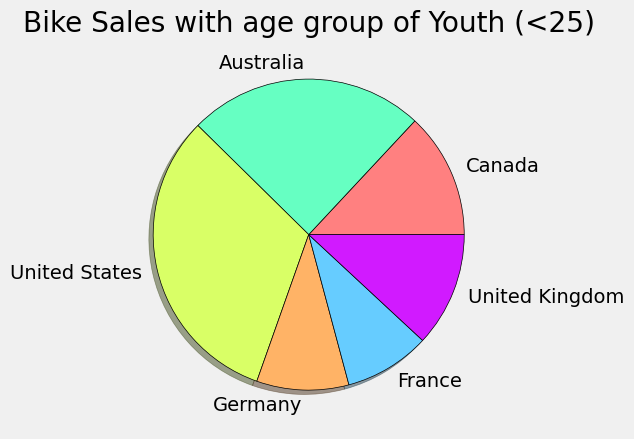

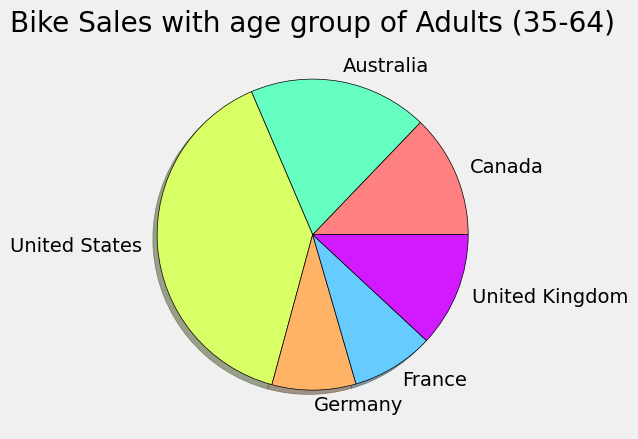

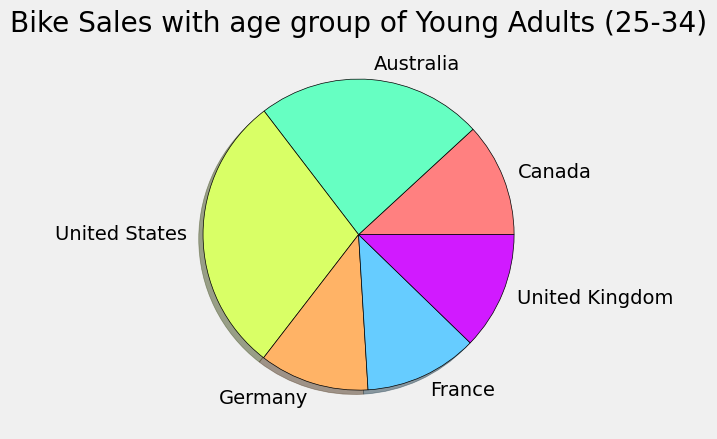

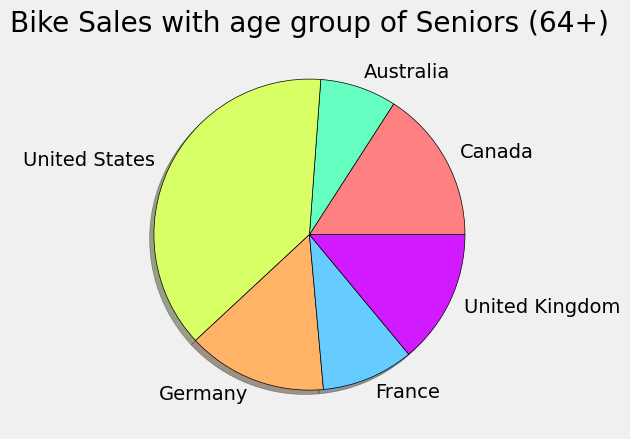

In [17]:
plt.style.use('fivethirtyeight')
for i in range(len(data)):
    plt.title(f'Bike Sales with age group of {age_group[i]}')
    plt.pie(data.iloc[i].values, labels= countries, colors= colors, shadow=True, wedgeprops= {'edgecolor': 'black'})
    plt.show()
    

In [18]:
product_category = pd.unique(sales.Product_Category)

In [19]:
product_category

array(['Accessories', 'Clothing', 'Bikes'], dtype=object)

In [20]:
items_brought = pd.DataFrame(columns= countries, index= product_category)

In [21]:
for i in countries:
    for product in product_category:
        count = sales[(sales['Country'] == i) & (sales['Product_Category'] == product)].shape[0]
        items_brought.loc[product, i] = count

In [22]:
items_brought

,Canada,Australia,United States,Germany,France,United Kingdom
Accessories,10232,13498,25042,6546,6688,8114
Clothing,2398,3374,6136,1504,1540,1982
Bikes,1548,7064,8028,3048,2770,3524


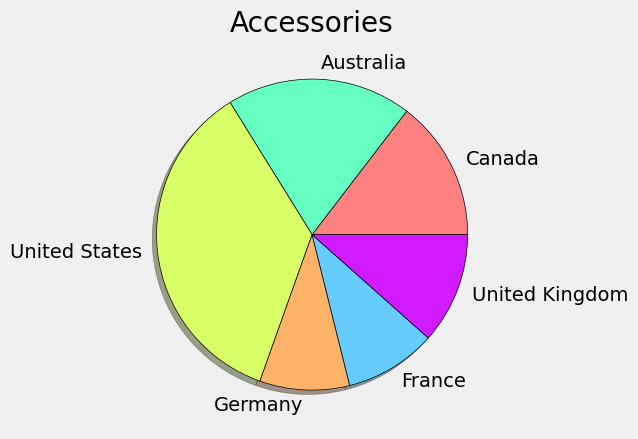

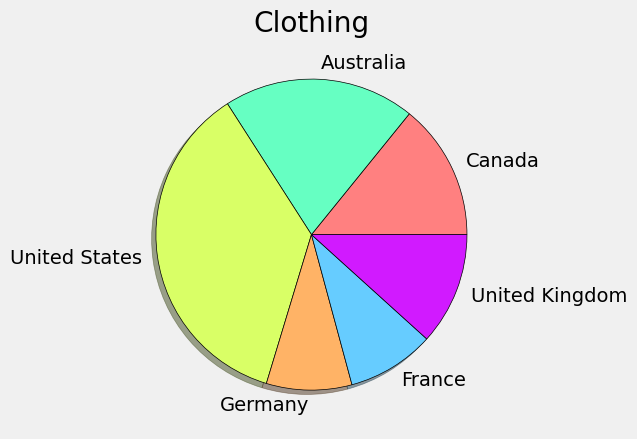

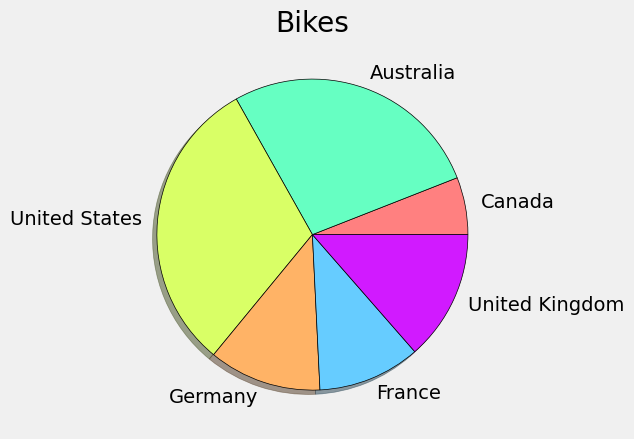

In [23]:
plt.style.use('fivethirtyeight')
for i in range(len(items_brought)):
    plt.title(f'{product_category[i]}')
    plt.pie(items_brought.iloc[i].values, labels= countries, colors= colors, shadow=True, wedgeprops= {'edgecolor': 'black'})
    plt.show()

In [24]:
sub_categories = pd.unique(sales.Sub_Category)

In [25]:
sub_categories

array(['Bike Racks', 'Bike Stands', 'Bottles and Cages', 'Caps',
       'Cleaners', 'Fenders', 'Gloves', 'Helmets', 'Hydration Packs',
       'Jerseys', 'Mountain Bikes', 'Road Bikes', 'Shorts', 'Socks',
       'Tires and Tubes', 'Touring Bikes', 'Vests'], dtype=object)

In [26]:
sales.tail()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260
113035,2016-03-04,4,March,2016,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",23,24,64,655,552,1207


In [27]:
coloumns = sales.columns

In [28]:
columns_for_df = coloumns[12:15]


In [29]:
items = pd.unique(sales.Product)

In [30]:
money_spend = pd.DataFrame(columns= columns_for_df, index= items)


In [31]:
money_spend

,Order_Quantity,Unit_Cost,Unit_Price
Hitch Rack - 4-Bike,NaN,NaN,NaN
All-Purpose Bike Stand,NaN,NaN,NaN
Mountain Bottle Cage,NaN,NaN,NaN
Water Bottle - 30 oz.,NaN,NaN,NaN
Road Bottle Cage,NaN,NaN,NaN
...,...,...,...
"Touring-2000 Blue, 50",NaN,NaN,NaN
"Touring-2000 Blue, 60",NaN,NaN,NaN
"Classic Vest, L",NaN,NaN,NaN
"Classic Vest, M",NaN,NaN,NaN


In [32]:
sales[sales.Product == 'Hitch Rack - 4-Bike']

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,2015-10-27,27,October,2015,32,Young Adults (25-34),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
592,2013-07-22,22,July,2013,18,Youth (<25),F,United States,California,Accessories,Bike Stands,Hitch Rack - 4-Bike,4,45,120,290,180,470
593,2015-07-22,22,July,2015,18,Youth (<25),F,United States,California,Accessories,Bike Stands,Hitch Rack - 4-Bike,3,45,120,218,135,353
594,2013-10-10,10,October,2013,18,Youth (<25),F,United States,California,Accessories,Bike Stands,Hitch Rack - 4-Bike,3,45,120,218,135,353


In [33]:
for i in items:
    for j in columns_for_df:
        if j == 'Unit_Price' or j == 'Unit_Cost':
            money_spend.loc[i, j] = sales[sales['Product'] == i][j].iloc[0]
        else:
            order_quantity = sales[sales['Product'] == i][j].sum()
            money_spend.loc[i,j] = order_quantity

In [35]:
money_spend

,Order_Quantity,Unit_Cost,Unit_Price
Hitch Rack - 4-Bike,4753,45,120
All-Purpose Bike Stand,2400,59,159
Mountain Bottle Cage,37480,4,10
Water Bottle - 30 oz.,164086,2,5
Road Bottle Cage,40164,3,9
...,...,...,...
"Touring-2000 Blue, 50",265,755,1215
"Touring-2000 Blue, 60",194,755,1215
"Classic Vest, L",4651,24,64
"Classic Vest, M",4876,24,64


In [36]:
money_spend['Cost_Price'] = money_spend['Order_Quantity'] * money_spend['Unit_Cost']
money_spend['Selling_Price'] = money_spend['Order_Quantity'] * money_spend['Unit_Price']

In [37]:
money_spend['Profit'] = money_spend['Selling_Price'] - money_spend['Cost_Price']

In [38]:
money_spend

,Order_Quantity,Unit_Cost,Unit_Price,Cost_Price,Selling_Price,Profit
Hitch Rack - 4-Bike,4753,45,120,213885,570360,356475
All-Purpose Bike Stand,2400,59,159,141600,381600,240000
Mountain Bottle Cage,37480,4,10,149920,374800,224880
Water Bottle - 30 oz.,164086,2,5,328172,820430,492258
Road Bottle Cage,40164,3,9,120492,361476,240984
...,...,...,...,...,...,...
"Touring-2000 Blue, 50",265,755,1215,200075,321975,121900
"Touring-2000 Blue, 60",194,755,1215,146470,235710,89240
"Classic Vest, L",4651,24,64,111624,297664,186040
"Classic Vest, M",4876,24,64,117024,312064,195040


In [39]:
money_spend['Profit Percentage'] = (money_spend.Profit/ money_spend.Cost_Price) * 100

In [40]:
money_spend

,Order_Quantity,Unit_Cost,Unit_Price,Cost_Price,Selling_Price,Profit,Profit Percentage
Hitch Rack - 4-Bike,4753,45,120,213885,570360,356475,166.666667
All-Purpose Bike Stand,2400,59,159,141600,381600,240000,169.491525
Mountain Bottle Cage,37480,4,10,149920,374800,224880,150.0
Water Bottle - 30 oz.,164086,2,5,328172,820430,492258,150.0
Road Bottle Cage,40164,3,9,120492,361476,240984,200.0
...,...,...,...,...,...,...,...
"Touring-2000 Blue, 50",265,755,1215,200075,321975,121900,60.927152
"Touring-2000 Blue, 60",194,755,1215,146470,235710,89240,60.927152
"Classic Vest, L",4651,24,64,111624,297664,186040,166.666667
"Classic Vest, M",4876,24,64,117024,312064,195040,166.666667
